<a href="https://colab.research.google.com/github/sss4920/machinelearning_study/blob/main/07_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
# k - 최근접이웃분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))


0.8907563025210085
0.85


In [9]:
# 타깃 데이터를 만들 때 fish['Species']를 사용해 만들었기 때문에 훈련세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가있다.
# 이처럼 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류라고 부른다.
#이진분류 때에는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃데이터를 만들었다.
#다중분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 편리하게 문자열로 된 타깃값을 그대로 사용할 수 있다.
#주의 : 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳순
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
# 이 5개 샘플에 대한 예측은 어떤 확률로 만들어진건가
# 사이킷런의 분류 모델은 predict_proba()메서드로 클래스별 확률 값을 반환한다.
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [12]:
#column으로 보면 첫번째 줄이 bream에 대한 확률, 두번째 줄이 Parkki에 대한 확률
#kneighbors 의 입력은 2차원 배열이어야함.이를 위해 넘파이 배열의 슬라이싱연산자 사용. 슬라이싱연산자는 하나의 샘플만 선택해도 항상 2차원 배열 만들어짐
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


In [13]:
#로지스틱 회귀
#이름은 회귀이지만 분류 모델이다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다. 예로 이렇게 나타낼 수 있다.

z = a * (Weight) + b * (Length) + c * (Diagonal) + d* (Height) + e * (Width) + f

In [14]:
# a,b,c,d,e 는 가중치 혹은 계수이다. 특성은 늘어났지만 3장에서 다룬 다중 회귀를 위한 선형 방정식과 같다. z는 어던 값도 가능하다.하지만 확률이 되려면 0~1 사이 값이 되어야한다.
# z가 아주 큰 음수일 때 0이 되고,  z가 아주 큰 양수 일 때 1이 되도록 바꾸는 방법 -> 시그모이드 함수를 사용하면 된다.

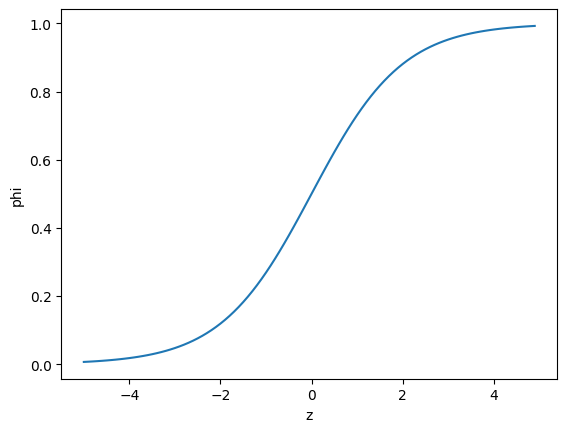

In [15]:
# 선형 방정식의 출력 z의 음수를 사용해 자연상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다.
# z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고, z가 무한하게 큰 양수가 될 땐 1에 가까워진다. 
# z가 0이 될때는 0.5가 되고 z가 어떤 값이 되더라도 절대로 0~1사이를 벗어날 수 없다.
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [16]:
# 이진 분류일 경우 시그모이드 함수의 출력이 0.5보다 크면 양성클래스, 0.5보다 작으면 음성클래스로 판단한다.
# 정확히 0.5일 때 라이브러리마다 다르다. 사이킷런은 0.5일 때 음성 클래스로 판단
# 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. 이를 불리언 인덱싱이라고 한다.
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [17]:
bream_smelt_indexes = (train_target =='Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [19]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [20]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [21]:
#위의 첫번째열이 음성클래스(0)에 대한 확률
print(lr.classes_)

['Bream' 'Smelt']


In [22]:
#smelt가 양성클래스다. 
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


z = -0.404 * (Weight) - 0.576 * (Length) - 0.663 * (Diagonal) - 1.013* (Height) - 0.732 * (Width) - 2.161

In [23]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [24]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [25]:
# 다중분류 와 이진분류의 차이점
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9327731092436975
0.925


In [26]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [27]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [28]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [30]:
decision = lr. decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [31]:
#소프트 맥스함수사용
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
